In [1]:
import numpy as np
import qiskit

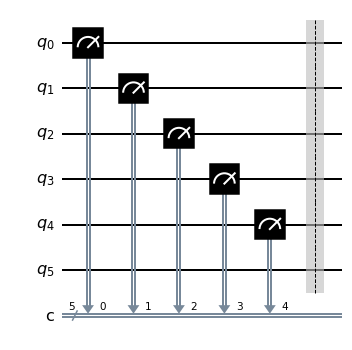

In [2]:
assert0_base = qiskit.QuantumCircuit(6,5, name="assert0")
assert0_base.measure(range(5),range(5))
assert0_base.barrier(range(6))
assert0_base.draw('mpl')

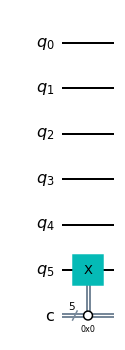

In [3]:
assert0_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[6]; // Quantum Register
creg c[5]; // Classical Register
 
if (c==0) x q[5]; // q[5] == 1 means assertion passed
""")
assert0_cond.draw('mpl')

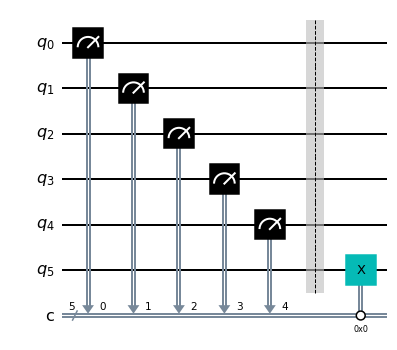

In [4]:
assert0 = assert0_base.compose(assert0_cond, range(6), front = False)
assert0.draw('mpl')

In [5]:
assert0_instr = assert0.to_instruction()

In [6]:
shors_full = qiskit.QuantumCircuit(9, 5, name = 'shors')

In [7]:
shors_full.rx(0.1*np.pi, range(5))

/home/dsmishler/anaconda3/lib/python3.8/site-packages/qiskit/visualization/matplotlib.py:278: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


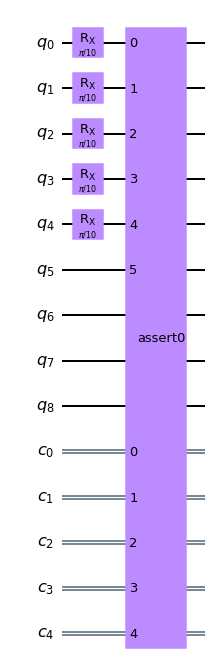

In [8]:
shors_full.append(assert0_instr, [0,1,2,3,4,5], [0,1,2,3,4])
shors_full.draw('mpl')

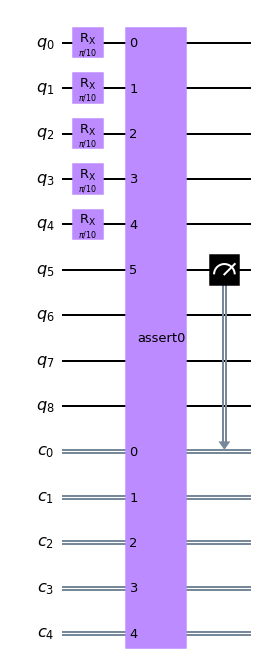

In [9]:
shors_full.measure(5,0)
shors_full.draw('mpl')

In [10]:
from qiskit.providers.aer import QasmSimulator

In [11]:
backend = QasmSimulator()
circ_compiled = qiskit.transpile(shors_full, backend)
job_sim = backend.run(circ_compiled, shots = 1024)
results_sim = job_sim.result()

In [12]:
counts = results_sim.get_counts(circ_compiled)
print(counts)

{'01010': 1, '11000': 2, '00000': 26, '00001': 897, '10010': 2, '01000': 21, '00110': 1, '00100': 23, '00010': 19, '10000': 32}


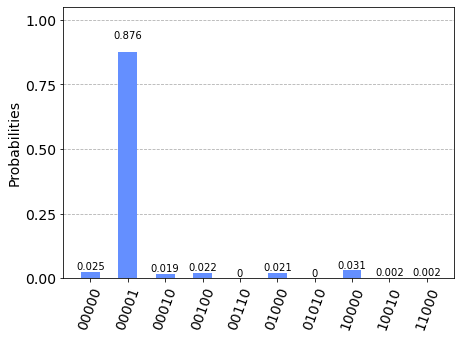

In [13]:
qiskit.visualization.plot_histogram(counts)